In [2]:
path="c:\\pytest\\"

In [16]:
import pandas as pd
df = pd.read_csv(path+'iris.csv')
df.head()
# 구해야 할 것, 각 컬럼과 숫자들의 규모 차이->스케일링해야 할지, 데이터의 유형

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
df.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [18]:
df = df.sample(frac=1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
99,5.7,2.8,4.1,1.3,versicolor
126,6.2,2.8,4.8,1.8,virginica
33,5.5,4.2,1.4,0.2,setosa
97,6.2,2.9,4.3,1.3,versicolor
37,4.9,3.6,1.4,0.1,setosa


In [19]:
df.nunique()

Sepal.Length    35
Sepal.Width     23
Petal.Length    43
Petal.Width     22
Species          3
dtype: int64

In [20]:
df.Species.unique()

array(['versicolor', 'virginica', 'setosa'], dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 99 to 59
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [22]:
len(df)

150

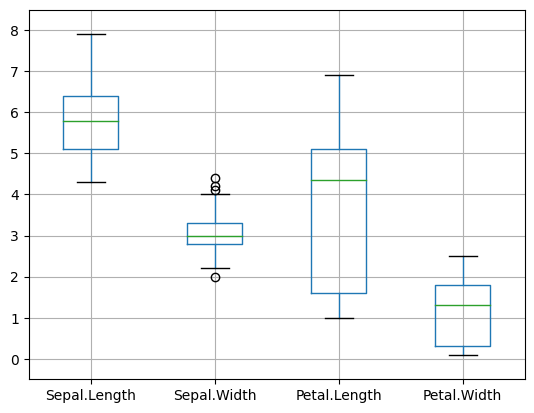

In [23]:
import matplotlib.pyplot as plt
df.boxplot()
plt.ylim((-0.5,8.5))
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :4]
y = df.iloc[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.head())
print("*"*20)
print(X_test.head())


     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
73            6.1          2.8           4.7          1.2
41            4.5          2.3           1.3          0.3
120           6.9          3.2           5.7          2.3
132           6.4          2.8           5.6          2.2
34            4.9          3.1           1.5          0.2
********************
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
117           7.7          3.8           6.7          2.2
12            4.8          3.0           1.4          0.1
46            5.1          3.8           1.6          0.2
30            4.8          3.1           1.6          0.2
103           6.3          2.9           5.6          1.8


In [31]:
df_num = df.select_dtypes(include=[float])
df_obj = df.select_dtypes(exclude=[float])

In [54]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(y_train)
y_train_transformed = e.transform(y_train)
y_train_transformed


array([1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1,
       0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0,
       2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 0, 2,
       0, 2])

In [33]:
y_train

73     versicolor
41         setosa
120     virginica
132     virginica
34         setosa
          ...    
3          setosa
24         setosa
128     virginica
1          setosa
113     virginica
Name: Species, Length: 112, dtype: object

In [45]:
sorted(zip(y_train.unique(), e.transform(y_train.unique())),key=lambda x:x[1])

[('setosa', 0), ('versicolor', 1), ('virginica', 2)]

In [47]:
dict(zip(y_train.unique(), e.transform(y_train.unique())))

{'versicolor': 1, 'setosa': 0, 'virginica': 2}

In [48]:
# transform 할 때 여러 컬럼이 있으면 변환되는지
# 변환되면 y_test는 컬럼이 하나인데 변환이 되는지
## 어차피 ytrain에 값이 없는 것이 ytest에 있으면 오류남

In [56]:
import tensorflow as tf
y_train_one_hot_encoding = tf.keras.utils.to_categorical(y_train_transformed)
y_train_one_hot_encoding

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [60]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='acc')
model.fit(X_train, y_train_one_hot_encoding, epochs=20, batch_size=1)

Epoch 1/20
112/112 [==============================] - 2s 4ms/step - loss: 1.4063 - acc: 0.3036
Epoch 2/20
112/112 [==============================] - 0s 4ms/step - loss: 0.9075 - acc: 0.4821
Epoch 3/20
112/112 [==============================] - 0s 4ms/step - loss: 0.7849 - acc: 0.6518
Epoch 4/20
112/112 [==============================] - 0s 4ms/step - loss: 0.6976 - acc: 0.7768
Epoch 5/20
112/112 [==============================] - 0s 4ms/step - loss: 0.6409 - acc: 0.7589
Epoch 6/20
112/112 [==============================] - 0s 4ms/step - loss: 0.5785 - acc: 0.8661
Epoch 7/20
112/112 [==============================] - 0s 4ms/step - loss: 0.5506 - acc: 0.8036
Epoch 8/20
112/112 [==============================] - 0s 4ms/step - loss: 0.5041 - acc: 0.8929
Epoch 9/20
112/112 [==============================] - 0s 4ms/step - loss: 0.4883 - acc: 0.8571
Epoch 10/20
112/112 [==============================] - 0s 4ms/step - loss: 0.4539 - acc: 0.9107
Epoch 11/20
112/112 [============================

In [61]:
y_test = e.transform(y_test)
y_test

array([2, 0, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 2])

In [62]:
y_test_one_hot_encoding = tf.keras.utils.to_categorical(y_test)
y_test_one_hot_encoding

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [64]:
model.evaluate(X_test, y_test_one_hot_encoding)[1]

2/2 [==============================] - 0s 4ms/step - loss: 0.3026 - acc: 0.9211


0.9210526347160339

In [65]:
import os
os.chdir("c:\\projects")

model.save('iris.h5')

from tensorflow.keras.models import load_model
loaded_model = load_model('iris.h5')

In [66]:
loaded_model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


array([[8.7406934e-04, 3.6335543e-01, 6.3577050e-01],
       [9.5340574e-01, 4.6475366e-02, 1.1890223e-04],
       [9.5462209e-01, 4.5324009e-02, 5.3952193e-05],
       [9.2811972e-01, 7.1642511e-02, 2.3771716e-04],
       [2.1275014e-03, 3.2957897e-01, 6.6829354e-01],
       [3.6054414e-03, 4.4393256e-01, 5.5246198e-01],
       [4.7744814e-02, 7.6995087e-01, 1.8230431e-01],
       [1.6843846e-02, 6.3022256e-01, 3.5293356e-01],
       [6.1753683e-02, 7.9586565e-01, 1.4238065e-01],
       [1.8858975e-03, 3.6804864e-01, 6.3006550e-01],
       [9.5185840e-01, 4.8067935e-02, 7.3663628e-05],
       [3.8777888e-02, 8.0869704e-01, 1.5252504e-01],
       [2.4841376e-02, 7.0527083e-01, 2.6988786e-01],
       [1.1579072e-03, 3.1827179e-01, 6.8057036e-01],
       [9.3818402e-01, 6.1737236e-02, 7.8717523e-05],
       [7.9856245e-03, 5.3172523e-01, 4.6028912e-01],
       [6.9011129e-02, 7.7481377e-01, 1.5617505e-01],
       [3.1937230e-03, 5.8062959e-01, 4.1617671e-01],
       [8.2782097e-04, 2.308

In [70]:
v = dict()
#a1 v134

In [81]:
new_data = dict(zip(X_train.columns, [5.3,3.4,1.4,0.2]))
new_data

{'Sepal.Length': 5.3,
 'Sepal.Width': 3.4,
 'Petal.Length': 1.4,
 'Petal.Width': 0.2}

In [85]:
new_data = pd.DataFrame.from_dict([new_data])
new_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.3,3.4,1.4,0.2


In [87]:
result = loaded_model.predict(new_data)
result 

1/1 [==============================] - 0s 20ms/step


array([[9.6489555e-01, 3.5059061e-02, 4.5452121e-05]], dtype=float32)

In [89]:
import numpy as np
result_idx = np.argmax(result)

if result_idx==0:
    print("setosa")
elif result_idx==1:
    print("versicolor")
else:
    print("virginica")

setosa
